In [1]:
import os
import numpy as np
import Cell_BLAST as cb
import utils
cb.config.RANDOM_SEED = 0
cb.config.N_JOBS = 4
fixed_model_kwargs = dict(
    latent_dim=10, cat_dim=20,
    epoch=500, patience=20
)

---

# Mouse

### Quake_Smart-seq2_Skin

,cell_ontology_class,cell_ontology_id,cell_type1,channel,cluster,dataset_name,donor,free_annotation,gender,organ,organism,platform,region
A12.MAA000427.3_11_M.1.1,keratinocyte stem cell,CL:0002337,keratinocyte stem cell,MAA000427,2.0,Quake_Smart-seq2_Skin,3_11_M,Inner Bulge,M,Skin,Mus musculus,Smart-seq2,Anagen
J12.MAA000427.3_11_M.1.1,keratinocyte stem cell,CL:0002337,keratinocyte stem cell,MAA000427,2.0,Quake_Smart-seq2_Skin,3_11_M,Inner Bulge,M,Skin,Mus musculus,Smart-seq2,Anagen
K14.MAA000427.3_11_M.1.1,keratinocyte stem cell,CL:0002337,keratinocyte stem cell,MAA000427,2.0,Quake_Smart-seq2_Skin,3_11_M,Inner Bulge,M,Skin,Mus musculus,Smart-seq2,Anagen
L16.MAA000427.3_11_M.1.1,keratinocyte stem cell,CL:0002337,keratinocyte stem cell,MAA000427,1.0,Quake_Smart-seq2_Skin,3_11_M,Outer Bulge,M,Skin,Mus musculus,Smart-seq2,Anagen
M18.MAA000427.3_11_M.1.1,keratinocyte stem cell,CL:0002337,keratinocyte stem cell,MAA000427,1.0,Quake_Smart-seq2_Skin,3_11_M,Outer Bulge,M,Skin,Mus musculus,Smart-seq2,Anagen


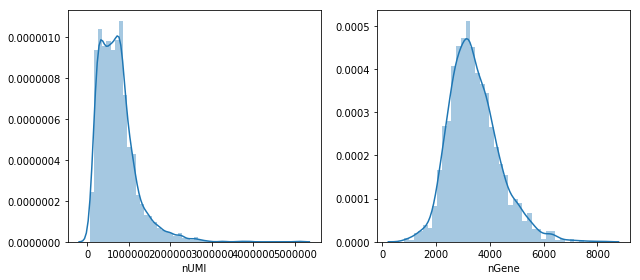

In [2]:
quake_smart_seq2_skin = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Quake_Smart-seq2_Skin/data.h5")
utils.peek(quake_smart_seq2_skin, "Quake_Smart-seq2_Skin")
quake_smart_seq2_skin = quake_smart_seq2_skin.normalize()
quake_smart_seq2_skin.obs.head()

In [3]:
opt_model_kwargs = dict(batch_effect="donor")
quake_smart_seq2_skin_model = cb.directi.fit_DIRECTi(
    quake_smart_seq2_skin, quake_smart_seq2_skin.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Quake_Smart-seq2_Skin/model_0"
)
quake_smart_seq2_skin.latent = quake_smart_seq2_skin_model.inference(quake_smart_seq2_skin)

[DIRECTi epoch 0] train=3.004, val=3.049, time elapsed=1.5s Regular save...
[DIRECTi epoch 1] train=2.996, val=3.038, time elapsed=0.2s
[DIRECTi epoch 2] train=2.983, val=3.024, time elapsed=0.2s
[DIRECTi epoch 3] train=2.969, val=3.009, time elapsed=0.2s
[DIRECTi epoch 4] train=2.953, val=2.990, time elapsed=0.2s
[DIRECTi epoch 5] train=2.930, val=2.960, time elapsed=0.2s
[DIRECTi epoch 6] train=2.886, val=2.887, time elapsed=0.2s
[DIRECTi epoch 7] train=2.679, val=2.622, time elapsed=0.2s
[DIRECTi epoch 8] train=2.012, val=1.855, time elapsed=0.2s
[DIRECTi epoch 9] train=1.220, val=1.457, time elapsed=0.2s
[DIRECTi epoch 10] train=1.132, val=1.331, time elapsed=0.2s Regular save...
[DIRECTi epoch 11] train=1.122, val=1.224, time elapsed=0.2s
[DIRECTi epoch 12] train=1.123, val=1.195, time elapsed=0.2s
[DIRECTi epoch 13] train=1.122, val=1.160, time elapsed=0.2s
[DIRECTi epoch 14] train=1.115, val=1.168, time elapsed=0.2s
[DIRECTi epoch 15] train=1.121, val=1.126, time elapsed=0.2s
[D

[  Info   ] Computing tSNE...


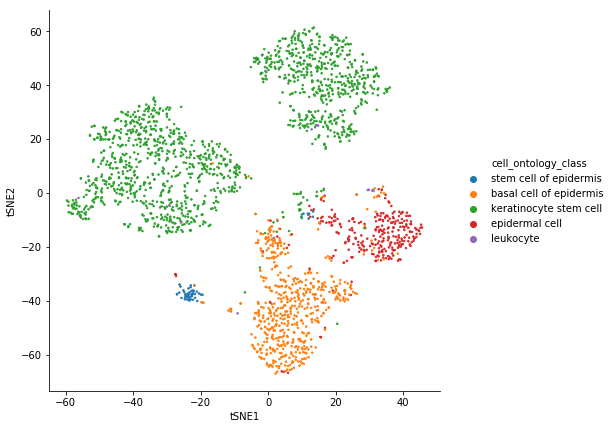

In [4]:
plot = quake_smart_seq2_skin.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("Quake_Smart-seq2_Skin/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


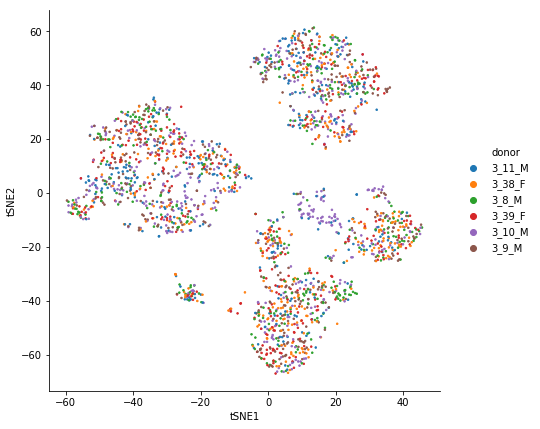

In [5]:
plot = quake_smart_seq2_skin.visualize_latent("donor")
plot.get_figure().savefig("Quake_Smart-seq2_Skin/donor.pdf", bbox_inches="tight")

In [6]:
%%capture capio
quake_smart_seq2_skin_models = [quake_smart_seq2_skin_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    quake_smart_seq2_skin_models.append(cb.directi.fit_DIRECTi(
        quake_smart_seq2_skin, quake_smart_seq2_skin.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Quake_Smart-seq2_Skin/model_%d" % i
    ))
quake_smart_seq2_skin_blast = cb.blast.BLAST(
    quake_smart_seq2_skin_models, quake_smart_seq2_skin, keep_exprs=True
).build_empirical()
quake_smart_seq2_skin_blast.save("Quake_Smart-seq2_Skin")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Skin/model_1/checkpoint-171
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Skin/model_2/checkpoint-184
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Skin/model_3/checkpoint-188


In [7]:
with open("Quake_Smart-seq2_Skin/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Quake_Smart-seq2_Skin/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [8]:
utils.self_projection(quake_smart_seq2_skin_blast, "Quake_Smart-seq2_Skin")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9472
Accuracy = 0.9799


---

# Human

### Philippeos

,cell_ontology_class,cell_ontology_id,cell_type1,dataset_name,organ,organism,platform,region
3145_cell1,fibroblast of dermis,CL:0002551,fibroblast of dermis,Philippeos,Skin,Homo sapiens,Smart-seq2,dermis
3145_cell2,fibroblast of dermis,CL:0002551,fibroblast of dermis,Philippeos,Skin,Homo sapiens,Smart-seq2,dermis
3145_cell3,fibroblast of dermis,CL:0002551,fibroblast of dermis,Philippeos,Skin,Homo sapiens,Smart-seq2,dermis
3145_cell4,fibroblast of dermis,CL:0002551,fibroblast of dermis,Philippeos,Skin,Homo sapiens,Smart-seq2,dermis
3145_cell5,fibroblast of dermis,CL:0002551,fibroblast of dermis,Philippeos,Skin,Homo sapiens,Smart-seq2,dermis


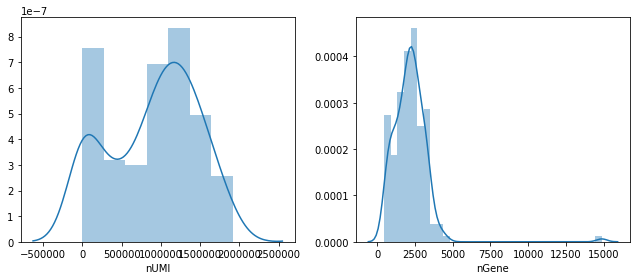

In [9]:
philippeos = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Philippeos/data.h5")
utils.peek(philippeos, "Philippeos")
philippeos = philippeos.normalize()
philippeos.obs.head()

In [10]:
opt_model_kwargs = dict(h_dim=32, batch_size=64)
philippeos_model = cb.directi.fit_DIRECTi(
    philippeos, philippeos.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Philippeos/model_0"
)
philippeos.latent = philippeos_model.inference(philippeos)

[DIRECTi epoch 0] train=2.233, val=2.838, time elapsed=0.9s Best save...
[DIRECTi epoch 1] train=2.272, val=2.838, time elapsed=0.0s Best save...
[DIRECTi epoch 2] train=2.307, val=2.838, time elapsed=0.0s Best save...
[DIRECTi epoch 3] train=2.277, val=2.838, time elapsed=0.0s Best save...
[DIRECTi epoch 4] train=2.295, val=2.837, time elapsed=0.0s Best save...
[DIRECTi epoch 5] train=2.319, val=2.837, time elapsed=0.0s Best save...
[DIRECTi epoch 6] train=2.276, val=2.837, time elapsed=0.0s Best save...
[DIRECTi epoch 7] train=2.285, val=2.837, time elapsed=0.0s Best save...
[DIRECTi epoch 8] train=2.250, val=2.836, time elapsed=0.0s Best save...
[DIRECTi epoch 9] train=2.299, val=2.836, time elapsed=0.0s Best save...
[DIRECTi epoch 10] train=2.322, val=2.836, time elapsed=0.0s Best save...
[DIRECTi epoch 11] train=2.311, val=2.835, time elapsed=0.0s Best save...
[DIRECTi epoch 12] train=2.284, val=2.835, time elapsed=0.0s Best save...
[DIRECTi epoch 13] train=2.234, val=2.834, time 

[  Info   ] Computing tSNE...


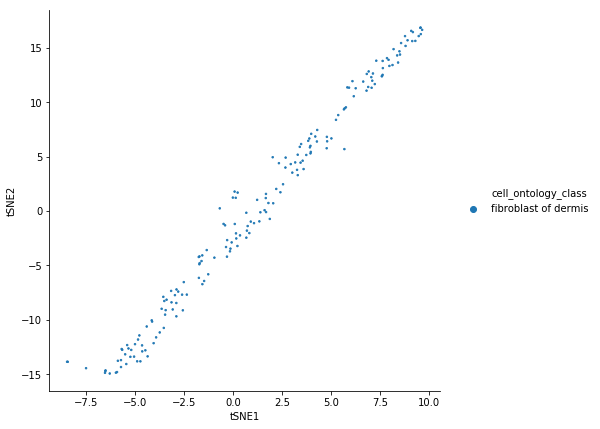

In [11]:
plot = philippeos.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("Philippeos/cell_ontology_class.pdf", bbox_inches="tight")

In [12]:
%%capture capio
philippeos_models = [philippeos_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    philippeos_models.append(cb.directi.fit_DIRECTi(
        philippeos, philippeos.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Philippeos/model_%d" % i
    ))
philippeos_blast = cb.blast.BLAST(
    philippeos_models, philippeos, keep_exprs=True
).build_empirical()
philippeos_blast.save("Philippeos")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Philippeos/model_1/checkpoint-138
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Philippeos/model_2/checkpoint-126
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Philippeos/model_3/checkpoint-131


In [13]:
with open("Philippeos/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Philippeos/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [14]:
utils.self_projection(philippeos_blast, "Philippeos")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.1957
Accuracy = 1.0000
